In [8]:
# Den nåværende strømkrisen har vært mye i media det siste og påvirker også enhver husstand i Norge, noe som gjør det til et høyaktuelt tema.
# Hadde vi sett noe slikt tidligere og var situasjonen så dramatisk som det virket som i nyhetsoverskriftene? Dette var spørsmål jeg lurte på og fikk svar på underveis.
# Strømkrisen er i stadig debatt i stortinget. Det er også vedtatt et tiltak for å støtte de husholdningene med minst inntekt som blir hardest rammet av krisen.
# Vi går inn i en kaldere årstid og det er dermed naturlig at strømetterspørselen går opp for å holde på varmen.

# Det er nesten daglige nyhetsartikler om strømprisene i økonomiaviser slik som e24 og dagens næringsliv. Det er også regelmessige oppslag på NRK kveldsnytt og er også blitt tatt opp som tema i Debatten.
# De fleste av disse nyhetene omhandler politikken rundt prisene og hvorfor det er blitt så dyrt, for eksempel hvorfor vi fortsetter å eksportere strøm selv om prisene fortsetter å øke for nordmenn.
# Kraftanalytikere jobber med slike oppgaver daglig. Flere av dem forutser at prisene kommer til å øke enda mer i vinter, som jeg selv også gjør i oppgaven.
# Faktorene bak krisen er mange og er noe jeg ikke har fokusert på i oppgaven. Jeg har heller valgt å analysere de tidligere prisene med de nåværende og fremstille de grafisk.
# SSB har vært min hovedkilde i oppgaven, de ligger på mye statistikk for strømpriser. Den jeg har tatt for meg er en kvartalsvis prisoversikt med merverdiafgift for husholdninger.
# Jeg har også tatt for meg en API fra nettsiden Entsoe som har oversikt over alle Eu og Eøs lands "day ahead prices". Disse viser en timesvis oversikt over prisutviklingen for dagen.
# Pandas og matplotlib er også pakker jeg hadde lyst å lære mer om, og er noe jeg ser for meg å få mye bruk for i fremtiden.

# Tanken bak selve oppgaven oppsto av å lese de dramatiske overskrivftene som stadig dukket opp. Det er en svært relevant oppgave for meg som samfunnsøkonomi student og er noe jeg kan bruke videre.
# Jeg var svært nysgjerrig på om dette kunne kalles en krise og om den fortjente disse overskriftene og medie oppmerksomheten.
# Mitt første mål var å ha en graf som viser prisutviklingen over tid og ble selv overasket over resultatet. Derfra kom ideen om en årlig figur istedenfor å ha det kvartalsvis.
# Etter å ha laget denne årlige grafen og så de store endringene fikk det meg til å tenke på inflasjon. Jeg sende mail til SSB fikk jeg vite at tallene ikke var inflasjonsjustert.
# Gjennom å bruke konsumprisindeksen som også er tatt ifra SSB laget jeg en inflasjonsjustert figur i tillegg.
# På det tidspunktet denne oppgaven ble skrevet hadde ikke tallene for fjerdekvartal 2021 kommet ut enda, men jeg ville regne meg fram til et ca svar på hva det kom til å bli.
# Når vinteren kommer er det naturlig at strømprisene øker, så jeg tok for meg alle 3-4 kvartalene jeg hadde og fant den gjennomsnittlige prosentvise økningen som var på ca 20%.
# Jeg lagde to grafer for å vise hvordan utviklingen hadde sett ut dersom prisene skulle økt med 20%, noe som ikke er helt utenkelig at de vil.
# Med de mange faktorene som spiller inn i disse prisene som for eksempel vær forhold, er det så klart umulig å komme fram til noe fasitsvar. 
# Til slutt ønsket jeg å lage noe jeg selv kunne få bruk for, så gjennom en API kunne jeg få fersk data uten å måtte laste ned en CSV fil. Dette ga meg muligheten til å lage en figur for en uke tilbake.
# Jeg innså at denne API'en kunne bli brukt til mye mer, så til slutt lagde jeg en figur som plotter hver timepris den siste uken.
# Figuren er delt opp 7 dager med en søyle for hver time, som gir et bilde av når på dagen strømmen er billigst. Jeg la også til en funksjon som printer hvilke timer på dagen strømmen er billigst/dyrest.

In [1]:
# Til å starte med importerer vi alle de nødvendige pakkene.
import pandas as pd
import numpy as np
import requests # Pakken som blir brukt til å lese API.
import datetime # Brukes til å manipulere tid og datoer.
import matplotlib.pyplot as plt 
import matplotlib.ticker
import matplotlib.dates
plt.style.use('ggplot') # 'ggplot' var min foretrukne plot style.

In [2]:
data = pd.read_csv("SSB_strømpriser_husholdninger.csv", index_col = 0, skiprows = (0, 1), \
    sep =";", na_values=[".", ".."], encoding = "latin-1") # Gjennom pandas leser jeg csv filen fra SSB.
print(data) # Printer dataframe filen "data".

              kvartal  Kraftpris inkl. mva (øre/kWh)
kontraktstype                                       
HUSHOLDNINGER  2012K1                           42.0
HUSHOLDNINGER  2012K2                           31.8
HUSHOLDNINGER  2012K3                           24.3
HUSHOLDNINGER  2012K4                           37.1
HUSHOLDNINGER  2013K1                           42.6
HUSHOLDNINGER  2013K2                           42.2
HUSHOLDNINGER  2013K3                           40.6
HUSHOLDNINGER  2013K4                           43.4
HUSHOLDNINGER  2014K1                           38.4
HUSHOLDNINGER  2014K2                           32.5
HUSHOLDNINGER  2014K3                           38.5
HUSHOLDNINGER  2014K4                           38.7
HUSHOLDNINGER  2015K1                           38.1
HUSHOLDNINGER  2015K2                           31.7
HUSHOLDNINGER  2015K3                           24.4
HUSHOLDNINGER  2015K4                           31.6
HUSHOLDNINGER  2016K1                         

(<AxesSubplot:xlabel='kvartal', ylabel='pris Øre/kwh'>,
 Text(0, 0.5, 'pris Øre/kwh'))

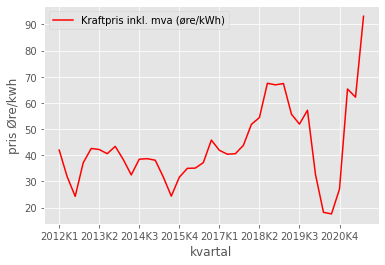

In [3]:
data.plot('kvartal','Kraftpris inkl. mva (øre/kWh)', color='red'), plt.ylabel("pris Øre/kwh") #Lager et plot for den kvartalsvise prisen over tid. Color='red' gjør grafen rød og plt.ylabel navngir y aksen.

In [ ]:
#Vi kan se hvor kraftig oppgangen har vært i 2021.

In [4]:
print(data.values.tolist())

[['2012K1', 42.0], ['2012K2', 31.8], ['2012K3', 24.3], ['2012K4', 37.1], ['2013K1', 42.6], ['2013K2', 42.2], ['2013K3', 40.6], ['2013K4', 43.4], ['2014K1', 38.4], ['2014K2', 32.5], ['2014K3', 38.5], ['2014K4', 38.7], ['2015K1', 38.1], ['2015K2', 31.7], ['2015K3', 24.4], ['2015K4', 31.6], ['2016K1', 35.0], ['2016K2', 35.1], ['2016K3', 37.2], ['2016K4', 45.8], ['2017K1', 41.9], ['2017K2', 40.4], ['2017K3', 40.6], ['2017K4', 43.8], ['2018K1', 51.8], ['2018K2', 54.4], ['2018K3', 67.5], ['2018K4', 66.9], ['2019K1', 67.4], ['2019K2', 55.7], ['2019K3', 51.9], ['2019K4', 57.2], ['2020K1', 32.7], ['2020K2', 18.2], ['2020K3', 17.6], ['2020K4', 27.1], ['2021K1', 65.3], ['2021K2', 62.2], ['2021K3', 93.1]]


In [5]:
tmpdict = {}
for i in data.values.tolist():
    if i[0][:4] not in tmpdict.keys():
        tmpdict[i[0][:4]] = 0
    tmpdict[i[0][:4]] = tmpdict[i[0][:4]] + i[1]
# Gjør dataframen om til et dict hvor kvartalene er plusset sammen til år
# I "tmpdict" blir keys=år og value=øre/kwh
print(tmpdict)

{'2012': 135.2, '2013': 168.8, '2014': 148.10000000000002, '2015': 125.79999999999998, '2016': 153.1, '2017': 166.7, '2018': 240.6, '2019': 232.2, '2020': 95.6, '2021': 220.6}


In [6]:
tet = pd.DataFrame.from_dict(tmpdict, orient='index') # For å gjøre det lett å plotte gjør jeg dictet om til en dataframe kalt "tet".

(<AxesSubplot:title={'center':'Utvikling i strømpris'}, ylabel='Sammenlagt 1-4 kvartal (øre/kwh)'>,
 Text(0.5, 1.0, 'Utvikling i strømpris'),
 Text(0, 0.5, 'Sammenlagt 1-4 kvartal (øre/kwh)'),
 <matplotlib.legend.Legend at 0x7f2b5c36c0a0>)

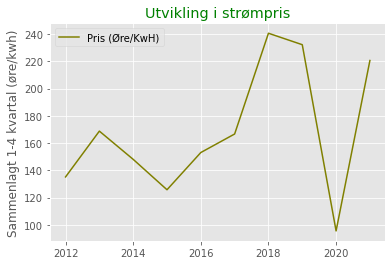

In [7]:
tet.plot(color='olive'), plt.title('Utvikling i strømpris', color='Green'), plt.ylabel('Sammenlagt 1-4 kvartal (øre/kwh)'), plt.legend(['Pris (Øre/KwH)'], loc="upper left")
# plotter "tet", plt.legend(['Pris (Øre/KwH)'], loc="upper left") gir navnet på selve grafen og plasserer den øverst til venstre.

In [8]:
# Selv om vi mangler det siste kvartalet av 2021 er prisen nesten på høyde med 2018, som var et annet år med høy strømpris.

In [12]:
#Bruker konsumprisindeks filen fra SSB, kalt "KPI.csv", i denne konsumprisindeksen er 2015=100
kpi = pd.read_csv("KPI.csv", index_col = 0, skiprows = (0, 1), \
    sep =";", na_values=[".", ".."], encoding = "latin-1")

In [13]:
kpi

,Konsumprisindeks (2015=100) 2012,Konsumprisindeks (2015=100) 2013,Konsumprisindeks (2015=100) 2014,Konsumprisindeks (2015=100) 2015,Konsumprisindeks (2015=100) 2016,Konsumprisindeks (2015=100) 2017,Konsumprisindeks (2015=100) 2018,Konsumprisindeks (2015=100) 2019,Konsumprisindeks (2015=100) 2020,Konsumprisindeks (2015=100) 2021
måned,,,,,,,,,,
Årsgjennomsnitt,93.9,95.9,97.9,100.0,103.6,105.5,108.4,110.8,112.2,NaN


In [14]:
print(type(kpi)) #finner ut at kpi er en dataframe
kpilist=kpi.values.tolist() #lager en liste "kpilist" ut av kpi ved bruk av values.tolist()
#ingen årsgjennomsnitt for 2021 enda, så tar i bruk siste kpi verdi fra oktober 2021 som er 117.2.
kpilist[0][-1] = 117.2 #erstatter NaN for 2021 med 117.2
kpilist

<class 'pandas.core.frame.DataFrame'>


[[93.9, 95.9, 97.9, 100.0, 103.6, 105.5, 108.4, 110.8, 112.2, 117.2]]

In [15]:
tetlist =tet.values.tolist() #Lager også en liste ut av "tet" som vi kaller "tetlist"
tetlist

[[135.2],
 [168.8],
 [148.10000000000002],
 [125.79999999999998],
 [153.1],
 [166.7],
 [240.6],
 [232.2],
 [95.6],
 [220.6]]

In [16]:
Inflasjon = [(tetlist[i][0]*100)/kpilist[0][i] for i in range(len(kpilist[0]))] # Bruker formelen for å regne inflasjon, ganger altså verdien med 100 og deler på den tilsvarende kpi'en til verdien.

In [17]:
Inflasjon

[143.9829605963791,
 176.0166840458811,
 151.2768130745659,
 125.79999999999998,
 147.7799227799228,
 158.00947867298578,
 221.95571955719555,
 209.5667870036101,
 85.20499108734403,
 188.22525597269623]

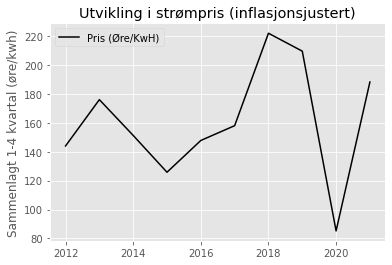

In [18]:
Inflasjondf = pd.DataFrame(Inflasjon, index=['2012', '2013', '2014','2015','2016','2017','2018','2019','2020','2021']) #Gjør "Inflasjon" om til en dataframe fra en liste, legger til årene for x aksen.
Inflasjondf.plot(color='black'), plt.title('Utvikling i strømpris (inflasjonsjustert)'), plt.ylabel('Sammenlagt 1-4 kvartal (øre/kwh)'), # plotter den nye dataframen "Inflasjondf".
plt.legend(['Pris (Øre/KwH)'], loc="upper left")

In [19]:
# Nå som vi har en inflasjonsjustert graf kan vi se at man fikk mer for pengene før 2015. Vi kan blant annet se at verdien fra 2021 gikk fra ca 220 til ca 190 øre/kwh.

In [20]:
#Selv om det ikke er kommet noen tall for fjerde kvartal 2021 kan vi prøve å regne oss frem til et ca tall ved å finne ut den gjennomsnittlige prosentvise økningen fra tredje til fjerde kvartal.

# Dette gjør jeg ved på lage en dataframe "df" med bare kvartal 3 og 4.

In [21]:
df = pd.DataFrame({
   'kvartal3' : [24.3, 40.6, 38.5, 24.4, 37.2, 40.6, 67.5, 51.9, 17.6],
    'kvartal4' : [37.1, 43.4, 38.7, 31.6, 45.8, 43.8, 66.9, 57.2, 27.1]},
index = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']) #Legger også til årstall.

In [22]:
prosentvisendring = df.pct_change(axis='columns') #Lager variabelen "prosentvisendring" med å bruke pandas funksjonen pct_change(axis='columns') på "df". Axis='columns' gir den prosentvise endringen
# mellom kvartal 3 og 4. Stryker man bort axis='columns' vil den regne ut prosentvise endring mellom årene. For eksempel endringen mellom kvartal3 2012 og kvartal3 2013.
prosentvisendring

,kvartal3,kvartal4
2012,NaN,0.526749
2013,NaN,0.068966
2014,NaN,0.005195
2015,NaN,0.295082
2016,NaN,0.231183
2017,NaN,0.078818
2018,NaN,-0.008889
2019,NaN,0.102119
2020,NaN,0.539773


In [23]:
print(prosentvisendring.mean())
# Ved bruk av mean() regnes gjennomsnittet.

kvartal3         NaN
kvartal4    0.204333
dtype: float64


In [24]:
# Definerer "k42021" ved å gange verdien til 3 kvartal 2021 med vekstfaktoren til 20.4%.
k42021 = 93.1 * 1.204

In [25]:
tet.at['2021', 0] = tet.at['2021', 0] + [k42021] #Legger til den forutsatte verdien til "tet".

In [26]:
tet

,0
2012,135.2000
2013,168.8000
2014,148.1000
2015,125.8000
2016,153.1000
2017,166.7000
2018,240.6000
2019,232.2000
2020,95.6000
2021,332.6924


(<AxesSubplot:title={'center':'Årlig prisutvikling med forutsatt fjerdekvartal'}, ylabel='Sammenlagt pris (øre/kwh)'>,
 Text(0.5, 1.0, 'Årlig prisutvikling med forutsatt fjerdekvartal'),
 Text(0, 0.5, 'Sammenlagt pris (øre/kwh)'),
 <matplotlib.legend.Legend at 0x7f2b5c285640>)

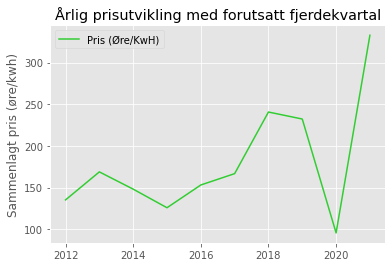

In [27]:
tet.plot(color = 'limegreen'), plt.title('Årlig prisutvikling med forutsatt fjerdekvartal'), plt.ylabel('Sammenlagt pris (øre/kwh)'), plt.legend(['Pris (Øre/KwH)'], loc="upper left")
# Plotter "tet" med den nye verdien.

In [28]:
# Dersom økningen skulle være på den gjennomsnittlige 20% Kan vi se at året 2021 kommer til å skille seg kraftig ut i fra tidligere.

# Jeg gjør også det samme med en kvartalsvis figur.

In [29]:
data2021K4 = pd.DataFrame({
                    'kvartal':['202K4'], 
                    'Kraftpris inkl. mva (øre/kWh)':[112.09]})

#Lager en ny dataframe med den forutsatte verdien.

In [30]:
data_forutsettning = data.append(data2021K4) # Lager en ny variabel "data_forutsettning" ut ifra "data" og legger til "data2021k4".

(Text(0.5, 1.0, ' kvartalsvis prisutvikling med forutsatt fjerdekvartal'),
 Text(0, 0.5, '(øre/kwh)'),
 <matplotlib.legend.Legend at 0x7f2b37fdca60>)

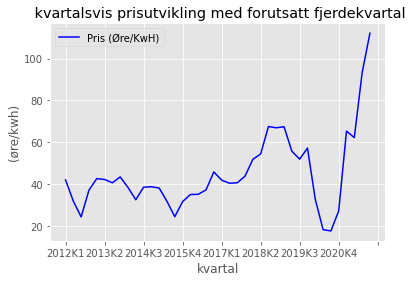

In [31]:
data_forutsettning.plot('kvartal','Kraftpris inkl. mva (øre/kWh)', color='blue'),
plt.title(' kvartalsvis prisutvikling med forutsatt fjerdekvartal'), plt.ylabel('(øre/kwh)'), plt.legend(['Pris (Øre/KwH)'], loc="upper left")

In [32]:
# Ut i fra grafen anslår jeg at prisen vil ligge på over 1kr per kwh i fjerde kvartal 2021.

In [33]:
weekdates = [] #lager en arrray med weekdates, for alle dager siste uken.
#appender dataen
for i in range(7):
    weekdates.append((datetime.date.today() - datetime.timedelta(days=i)).isoformat())
    

In [34]:
weekdata = [] #lager week data hvor vi legger inn data for de ulike dagene i weekdates
for date in weekdates:
    weekdata.append(requests.get("https://norway-power.ffail.win", params={"zone": "NO3", "date": date}).json()) #Dersom vi skulle regnet ut for Tromsø kunne jeg byttet "NO3" til "NO4".
#bruker .get, laster ned all dataen fra nettsiden(api), gir parameter "zone" "No3(midtnorge)", "date".
#printer det ut i et json format.

In [35]:
sistukedict = {} #lager et dict for strømrpisdataene den siste uken.
for data in weekdata:
    key = list(data.keys())[0] #tidspunkt
    key2 = list(data[key].keys())[0]#NOK_per_kWh
    sistukedict[key.split("T")[0]] = data[key][key2]
    
# "T" er en type split i dictet mellom dato og tidspunkt.
# Så jeg deler strengen opp i biter på alle hendelser av "T".
# Uten denne split kommandoen hadde det blitt printet ut i en verdi, og sett noe slikt ut "2021-12-02T00:00+10:00".
# Bak ("T") har jeg også [0] noe som gjør at bokstaven "T" ikke printes i det hele tatt.

In [36]:
sistukedict

{'2021-12-03': 1.1138,
 '2021-12-02': 0.3905,
 '2021-12-01': 1.2489,
 '2021-11-30': 0.361,
 '2021-11-29': 1.4809,
 '2021-11-28': 1.735,
 '2021-11-27': 1.1162}

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '2021-11-27'),
  Text(0.0, 0, '2021-12-03'),
  Text(1.0, 0, '2021-12-02'),
  Text(2.0, 0, '2021-12-01'),
  Text(3.0, 0, '2021-11-30'),
  Text(4.0, 0, '2021-11-29'),
  Text(5.0, 0, '2021-11-28'),
  Text(6.0, 0, '2021-11-27'),
  Text(7.0, 0, '')])

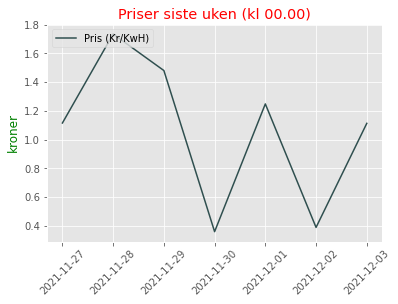

In [37]:
sistukedf = pd.DataFrame.from_dict(sistukedict, orient='index') #lager en dataframe ut i fra dict for å lage en figur ut av resultatet.
sistukedf.plot(color = 'darkslategray').invert_xaxis(), plt.legend(['Pris (Kr/KwH)'], loc="upper left"), plt.title('Priser siste uken (kl 00.00)', color='red'), plt.ylabel('kroner', color='green')
plt.xticks(rotation=45) # Plotter dataene for den siste uka, bruker plt.xticks(rotation=45) for at x verdiene skal være leselige. Uten denne hadde x verdiene vært oppå hverandre.

In [38]:
#Denne Figuren vil være forskjellig ut ifra hvilket tidspunkt koden blir kjørt på. I det tidspunktet jeg skriver dette kan vi se at Kl 00.00 28 november var prisen på sitt høyeste de siste 7 dagene.

In [39]:
storage = {} #"Dato": [val1, val2, ..., val24]
for data in weekdata:
    storage[list(data.keys())[0].split("T")[0]] = [data[hour]['NOK_per_kWh'] for hour in list(data.keys())]
# "Storage" blir et dict som inneholder alle strømpriser for hver time de siste 7 dagene.
print(storage)

{'2021-12-03': [1.1138, 1.0609, 1.0436, 1.0275, 1.0175, 1.0471, 1.091, 1.3838, 1.9733, 1.9138, 1.7458, 1.3508, 1.3296, 1.3306, 1.3149, 1.2036, 1.1745, 1.1451, 0.97, 0.9695, 0.7278, 0.648, 0.5984, 0.5275], '2021-12-02': [0.3905, 0.2951, 0.3695, 0.6354, 0.7589, 0.9232, 1.0873, 1.479, 1.9363, 1.9369, 1.8956, 1.9203, 1.9737, 2.1839, 2.4301, 2.8803, 2.9889, 2.1714, 1.4964, 1.1285, 1.135, 1.1307, 1.0767, 1.042], '2021-12-01': [1.2489, 1.0501, 0.9558, 0.9222, 0.9514, 1.0905, 1.1297, 1.1802, 1.1803, 1.1825, 1.1822, 1.1745, 1.1713, 1.1725, 1.1759, 1.1773, 1.1962, 1.1947, 1.1857, 1.1625, 1.1868, 1.11, 0.8495, 0.6985], '2021-11-30': [0.361, 0.3542, 0.3691, 0.4044, 0.5403, 0.7361, 0.9579, 1.4229, 2.0614, 1.5689, 1.7395, 1.6806, 1.6445, 1.6955, 1.8553, 2.4543, 2.6663, 2.5922, 2.2467, 1.6788, 1.593, 1.5145, 1.3975, 1.2159], '2021-11-29': [1.4809, 1.4419, 1.345, 1.3089, 1.3735, 1.4977, 2.1175, 2.8407, 3.2499, 3.1415, 2.9034, 2.93, 2.9348, 3.1313, 3.2598, 3.4557, 3.5331, 3.0692, 1.84, 1.6397, 0.9235, 

Time 2: 0.9387428571428572
Time 16: 2.2743714285714285


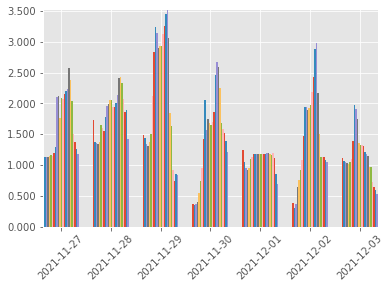

In [40]:
# Med dictet "Storage" har vi data til å plotte en figur for den siste uken.
average_time_costs = [] #Definerer variabelen som en liste.
x = list(storage.keys()) # x defineres så som en liste med alle keysene fra storage (som er datoene våre)
x = matplotlib.dates.date2num(x) # matplotlib har en innebygd funksjon som gjør om datoer til integers (tall) som kjøres under
w = 0.03 # definerer  en variabel "w" som er bredden på barene.
matplotlib.pyplot.xticks(rotation=45) # Gjør datoene lesbare ved å rotere.
ax = matplotlib.pyplot.subplot(111) # Definerer ax som et subplot med parameter 111.
for time_index in range(24): #itererer over alle tallene fra 0 til 23 i en for loop med time_index.
    tmp = [costs[time_index] for costs in list(storage.values())] # lager så en liste tmp som er en liste som inneholder kr/kWh for hver dato i settet vårt med datoer.
    average_time_costs.append(sum(tmp) / len(tmp)) # legger så til summen av listen tmp delt på lengden av listen for å få average kostnaden til den timen av døgnet inn i average_time_cost listen.
    ax.bar(x+(time_index - 11.5)*w, tmp, width=w, align='center') # bruker så ax.bar for å lage barene i figuren.

print(f'Time {average_time_costs.index(min(average_time_costs))}: {min(average_time_costs)}') # Printer ut den timen med gjennomsnittlig minst pris.
print(f'Time {average_time_costs.index(max(average_time_costs))}: {max(average_time_costs)}') # Printer ut den timen med gjennomsnittlig høyest pris.

ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.3f')) # formatterer y-aksen slik at den bare inneholder 3 siffer etter komma.
ax.xaxis_date() # konverterer de datoene vi konverterte til nummer tidligere tilbake til datoer.
ax.autoscale(tight=True)
matplotlib.pyplot.show()

In [41]:
# Dette plottet gir oss et bilde av den siste ukens strømpriser delt opp i timer. Denne figuren baserer seg også på når koden er kjørt, og plottes med data hentet fra Entsoe's day ahead prices.
# Over figuren blir det printet ut hvilken time strømmen er billigst og dyrest.
# Den 29 November skiller seg ut med en pris med en topp på 3.5kr per kwh.

In [42]:
# Elektrisitetsprisene har definitivt vært økende så langt i 2021. Det er tydelige tegn til at 2021 blir rekord året, og dessverre ser det ut som fjerdekvartalet for 2021 får de høyeste prisene av alle.
# Det er om situasjonen ikke endrer seg, det er jo som sagt mange faktorer som spiller inn. Situasjonen kan så klart endre seg om vi blir heldigere med klimaet eller situasjonen i Europa endrer seg.
# Gjennom Pandas og Matplotlib er mulighetene uendelige til å laste inn data og fremstille dem i form av figurer. SSB er en av mange nettsider som ligger på store mengder data.
# På grafene kan vi se hvor billig strøm var i 2020 og 2021 noe som viser hvor raskt disse prisene kan endre seg ut i fra de politiske situasjonene og værforholdene i Europa.
# Vi går inn i en kaldere årstid og dersom du liker det varmt og godt kan det fort bli dyrt. Med Varme i gulvet og varmepumpen på fullt kan regningen fort bli lang.
# Oppgaven har gitt meg svært god innsikt i bruken av både Matplotlib og Pandas, som jeg trur jeg vil ha svært stort nytte av fremover.

In [ ]:
# Kilder:
# Statistisk sentralbyrå. (2021, 15. November). Elektrisitetspriser. Hentet fra: https://www.ssb.no/energi-og-industri/energi/statistikk/elektrisitetspriser
# Statistisk sentralbyrå. (2021, 10. November). Konsumprisindeksen. Hentet fra: https://www.ssb.no/priser-og-prisindekser/konsumpriser/statistikk/konsumprisindeksen
# Entsoe. (2021, 02. November). Day-ahead Prices. Hentet fra: https://transparency.entsoe.eu/